In [1]:
%load_ext autoreload
%autoreload 2
import sys
if '..' not in sys.path: sys.path.append("..")

In [ ]:
%reset -f
%matplotlib inline

# Segmentation final!

In [23]:
from src.segmentation import cam
from src.classifier.agent import load_trainer
import nibabel as nib
from src.segmentation.cam import CAMS
from torch.utils.tensorboard import SummaryWriter

"""
image = {
    'CN':nib.load('data/SPM_categorised/AIH/CN/CN_ADNI_998.nii').get_fdata,
    'MCI':nib.load('data/SPM_categorised/AIH/MCI/MCI_ADNI_1586.nii').get_fdata,
    'AD':nib.load('data/SPM_categorised/AIH/AD/AD_ADNI_2975.nii').get_fdata
}
"""
trainer, dataset, model = load_trainer('resnet50')
tmp_image = nib.load('../data/SPM_categorised/AIH/AD/AD_ADNI_2975.nii').get_fdata()
tmp = cam.CAM(CAMS.GradCAMpp.value, model, tmp_image)


tb_writer = SummaryWriter(log_dir=f'logs/visualisation/{type(model.model.model).__name__}/version_{round(time.time())}', filename_suffix='.CAM')

Dataset sizes - Training: 421 Validation: 47


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
Using native 16bit precision.
INFO:lightning:Using native 16bit precision.


Architecture [ResNet] was created
***Defined hyperparameters:***
"arch":                {'name': 'resnet50', 'args': {}}
"callbacks":           ['litprogressbar', 'modelcheckpoints', 'metriccallback']
"checkpoint_path":     None
"class_weights":       None
"hp_metrics":          ['loss', 'loss', 'accuracy', 'auc', 'specificity', 'sensitivity']
"kfold":               {'enable': False, 'folds': 10}
"loss":                CrossEntropyLoss
"loss_weight_balance": None
"optimizer":           {'type': 'Adam', 'args': {'lr': 0.0002, 'weight_decay': 1e-05, 'amsgrad': True}}
3


/home/stud/f/fremar16/miniconda3/envs/Master-thesis/lib/python3.9/site-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


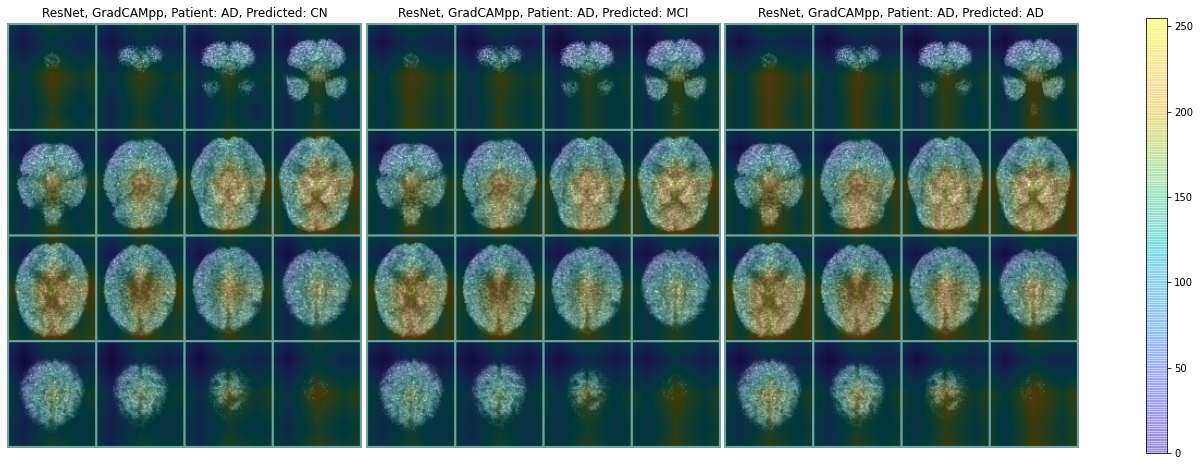

In [98]:
tmp.plot(tmp.class_scores, [0,1,2], class_label="AD");

#tb_writer.add_figure(f"{extractor_name}/{image}/{observed_class}",fig)